# 💻IDS507 | Lab02
<font size=5><b>Pandas 활용한 전처리<b></font>
<div align='right'>TA: 류 회 성(Hoe Sung Ryu)</div>

## Concepts | 오늘 배울 개념
---
- 판다스 패키지를 통하여 데이터 전처리를 할 수 있다
  1. 조건색인
  1. 결측치 처리
  1. 인코딩
  1. 시각화


## 📌1.드라이브 연동

In [ ]:
from google.colab import drive # 드라이브 연동
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/IDS507-00/2022_IDS507_Lab') # DataPath 설정 

FileNotFoundError: ignored

In [ ]:
!pwd

/content/gdrive/MyDrive/IDS507-00/2022_IDS507_Lab


<img src='/content/gdrive/MyDrive/IDS507-00/2022_IDS507_Lab/imgs/machine_learning_pipline.png'>

## 📌2.데이터 분석(EDA)

실제 `mpg` 데이터셋(https://archive.ics.uci.edu/ml/datasets/Auto+MPG)을 가지고 분석을 해보고, 전처리를 해보는 시간을 갖도록 하겟습니다.

- target
> - mpg(miles per gallon) = 연비

- features
> - cylinders = 실린더 개수
> - displacement = 배기량
> - horsepower = 마력
> - weight = 무게
> - acceleration = 테이블당 사람 수
> - model_year = 생산년도
> - origin = 생산국
> - name = 자동차 모델명



### 1) 데이터 기본정보확인하기
우선, 데이터 분석을 하기 위해서는 가장 먼저 해야되는 일은 데이터를 확인하는 일입니다. 이과정을 EDA 라고 하며 다음과 같은 순서로 진행합니다.  
1. 데이터의 형태 확인 
2. 결측치확인 
3. 어떠한 피쳐들이 주어졌는지 확인
4. 각각의 피쳐들의 타입과 분포 확인 



In [ ]:
# data import 

import seaborn as sns 
 
mpg = sns.load_dataset('mpg') # mpg data
mpg.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.shape

(398, 9)

In [ ]:
# 어떠한 피쳐를 가지고 있는가? 
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
# 각 feature 가 의미하는 바
# 1. mpg: continuous
# 2. cylinders: multi-valued discrete
# 3. displacement: continuous
# 4. horsepower: continuous
# 5. weight: continuous
# 6. acceleration: continuous
# 7. model year: multi-valued discrete
# 8. origin: multi-valued discrete
# 9. car name: string (unique for each instance)
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   mpg            398 non-null    float64 
 1   cylinders      398 non-null    int64   
 2   displacement   398 non-null    float64 
 3   horsepower     392 non-null    float64 
 4   weight         398 non-null    int64   
 5   acceleration   398 non-null    float64 
 6   model_year     398 non-null    int64   
 7   origin         398 non-null    object  
 8   name           398 non-null    object  
 9   brand          398 non-null    object  
 10  cylinders_cut  398 non-null    category
dtypes: category(1), float64(4), int64(3), object(3)
memory usage: 31.8+ KB


In [ ]:
# numeric data 분석
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


🔍 해석해보기

- **horsepower** 에 결측치가 존재하며, 이외에는 데이터가 정상적으로 있다는 것을 알 수 있다.
- 평균값(**mean**)이 중앙값(50%) 보다 크므로 `오른쪽으로 늘어져잇다(right skew)`



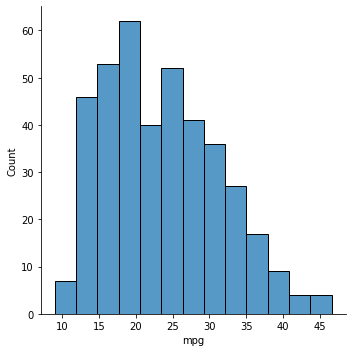

In [ ]:
sns.displot(mpg.mpg)

In [ ]:
#  categorical data 분석
mpg.describe(include=['O'])

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


🔍 해석 해보기 
- `count` : 해당 열에서 NaN을 제외한 데이터의 개수
- `unique` : 해당 열에서 중복되지 않는 값의 개수
- `top` : 해당 열에서 가장 많이 중복되는 데이터
- `freq` : 가장 많이 중복되는 데이터의 개수

- `origin` 컬럼에서 `usa`가 398 중 249번 중복되었음

### 2) Encoding 해야될 변수 확인 

In [ ]:
 mpg.origin.unique() # 데이터는 순서나 랭크가 없다. --> OneHotEncoder

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
mpg.name.unique() # 데이터가 너무 많다. --> LabelEncoder

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

### 3) 결측치확인 

In [ ]:

mpg.isna().sum()

mpg              0
cylinders        0
displacement     0
horsepower       6
weight           0
acceleration     0
model_year       0
origin           0
name             0
brand            0
cylinders_cut    0
dtype: int64

In [ ]:
# 하나씩 확인도 가능 
print(mpg.mpg.isna().sum())
print(mpg.horsepower.isna().sum())

0
6


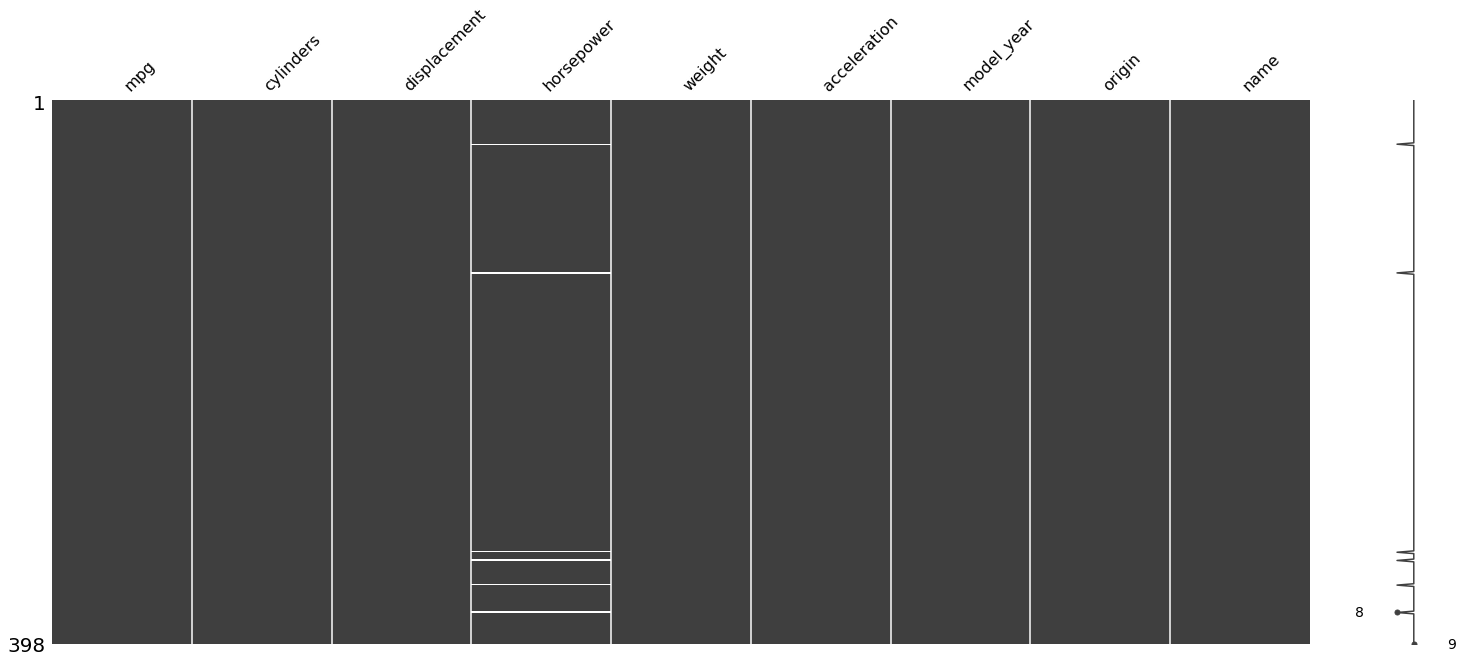

In [ ]:
import missingno as msno
msno.matrix(mpg)

### 4) 데이터 시각화 


In [ ]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
numeric_features = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']

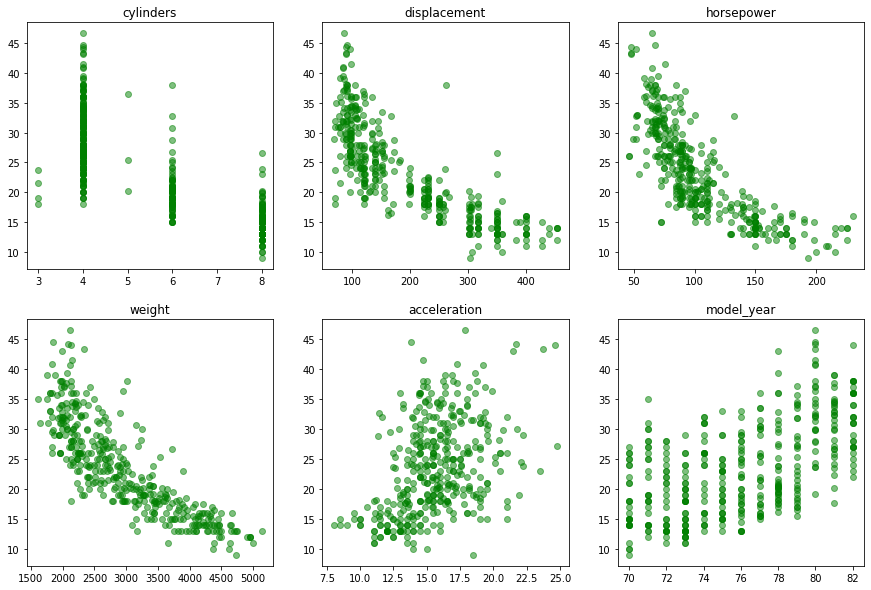

In [ ]:
import matplotlib.pyplot as plt
# making scatter plots for each predictor and the response 
plt.figure(figsize=(15,10))
for i,j in enumerate(numeric_features):
    plt.subplot(2,3,i+1)
    plt.scatter(mpg[j],mpg["mpg"], color = 'g', alpha = 0.5)
    plt.title(numeric_features[i])
plt.show()

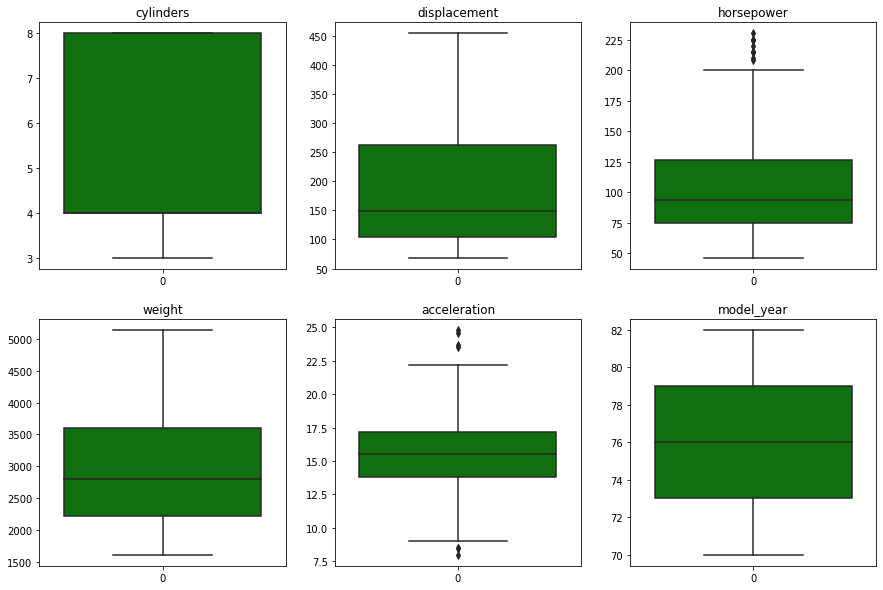

In [ ]:
import matplotlib.pyplot as plt
# making scatter plots for each predictor and the response 
plt.figure(figsize=(15,10))
for i,j in enumerate(numeric_features):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=mpg[j],color='green')
    # plt.scatter(mpg[j],mpg["mpg"], color = 'g', alpha = 0.5)
    plt.title(numeric_features[i])
plt.show()




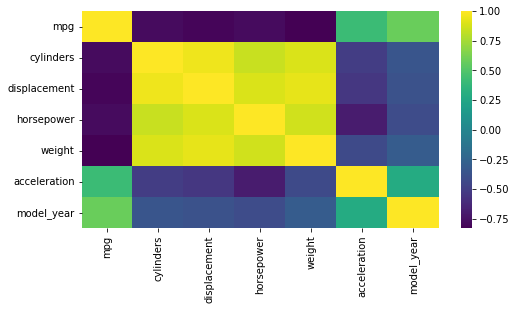

In [ ]:
# correlation matrix
corr_mat = mpg[['mpg'] + numeric_features].corr()

# correlation matrix heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr_mat, cmap = 'viridis');

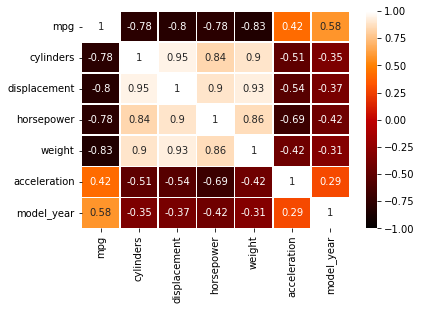

In [ ]:
sns.heatmap(mpg.corr(),vmin=-1, vmax=1, linewidth=0.5, annot=True, cmap=plt.cm.gist_heat)

### 5) VIF 값 확인하기 
- 각 변수마다 VIF를 보고 10이상인 경우 다중공선성이 있다고 판단 할수 있습니다. 

$VIF_i = {1 \over 1 - r_i}$ where $r_i= i$ 번째 변수를 제외한 회귀식의 $R^2$ 값

In [ ]:
# VIF to detect multicollinearity
import pandas as pd
import numpy as np
X = mpg[numeric_features]

vif = pd.DataFrame()
vif["VIF"] = np.linalg.inv(X.corr()).diagonal()
vif["features"] = X.columns
vif.sort_values('VIF',ascending=False)

,VIF,features
1,19.722728,displacement
3,10.686542,weight
0,10.585986,cylinders
2,9.410363,horsepower
4,2.619143,acceleration
5,1.250181,model_year


## 📌3.전처리(pre-processing)


### 1) 결측치 보간

1. 제거하기 
> - dropna()

1. 다른 값으로 대체하기
> - fillna()

1. interpolationa 방법을 사용하기 
> - method=linear 보간법 함수가 linear 
> - limit_direction='backward' # 뒤에서 부터 채워 오기 
> - imit_direction='forward' # 앞에서 채우기 
> - imit_direction='both' # 양 옆에서 채워나가기 



In [ ]:
# dropna  
df = pd.DataFrame([[1,2,np.nan],[1,2,3],[2,np.nan,4]],columns=['1st score','2nd score','3rd score'])
df

,1st score,2nd score,3rd score
0,1,2.0,NaN
1,1,2.0,3.0
2,2,NaN,4.0


In [ ]:
df.dropna(axis=0)

,1st score,2nd score,3rd score
1,1,2.0,3.0


In [ ]:
df.dropna(axis=1)

,1st score
0,1
1,1
2,2


In [ ]:
# fillna
df.fillna(1)

,1st score,2nd score,3rd score
0,1,2.0,1.0
1,1,2.0,3.0
2,2,1.0,4.0


In [ ]:
# interpolation 
display(df)
df.interpolate(method='linear')

,1st score,2nd score,3rd score
0,1,2.0,NaN
1,1,2.0,3.0
2,2,NaN,4.0


,1st score,2nd score,3rd score
0,1,2.0,NaN
1,1,2.0,3.0
2,2,2.0,4.0


In [ ]:
# interpolation 
display(df)
df.interpolate(method='linear',limit_direction='backward')

,1st score,2nd score,3rd score
0,1,2.0,NaN
1,1,2.0,3.0
2,2,NaN,4.0


,1st score,2nd score,3rd score
0,1,2.0,3.0
1,1,2.0,3.0
2,2,NaN,4.0


In [ ]:
# interpolation 
display(df)
df.interpolate(method='linear',limit_direction='both')

,1st score,2nd score,3rd score
0,1,2.0,NaN
1,1,2.0,3.0
2,2,NaN,4.0


,1st score,2nd score,3rd score
0,1,2.0,3.0
1,1,2.0,3.0
2,2,2.0,4.0


In [ ]:
# 연습해보기 
print(mpg.horsepower.isna().sum())


6


In [ ]:
tmp = mpg.horsepower.interpolate(method='linear',limit_direction='both')
print(tmp.isna().sum())

0


### 2) 변수추가하기 

In [ ]:
# 브랜드 추출하여 추가 해주기 
mpg.name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

<img src='https://i.stack.imgur.com/IZys3.png'>

In [ ]:
mpg.name.map(lambda x: x.split(' ')[0]).unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [ ]:
def split_brand(x):
  return x.split(' ')[0]

mpg.name.apply(split_brand)

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: name, Length: 398, dtype: object

In [ ]:
mpg['brand'] = mpg.name.map(lambda x: x.split(' ')[0])

In [ ]:
mpg.describe(include=['O'])

,origin,name,brand
count,398,398,398
unique,3,305,37
top,usa,ford pinto,ford
freq,249,6,51


In [ ]:
## pd.cut 

mpg['cylinders_cut'] = pd.cut(mpg['cylinders'],3)

In [ ]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,cylinders_cut
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,"(6.333, 8.0]"
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,"(6.333, 8.0]"
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,"(6.333, 8.0]"
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,"(6.333, 8.0]"
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,"(6.333, 8.0]"


In [ ]:
#각 age_band 별로 평균 survived 가 어느 정도인지 보여주는 피벗 테이블 
pd.pivot_table(mpg, values='mpg', columns='cylinders_cut')

cylinders_cut,"(2.995, 4.667]","(4.667, 6.333]","(6.333, 8.0]"
mpg,29.11875,20.24023,14.963107


🔍 해석 해보기 
- 유의미하게 차이 나는 것을 볼 수 있습니다.

### 3) Encoding

데이터는 크게 Numerical 또는 Categorical로 나뉩니다. 
파이썬에서 기본적인 머신러닝 모델들은 categorical value를 입력값으로 활용할 수 없습니다. 
따라서, categorical value를 를 numerical value로 변환해주는 작업이 필요합니다. 

1. Numerical (수치형)
  - Discrete
  - Continuous 
2. Categorical (범주형)
  - Nominal: 순서없는 데이터(성별, 클래스 라벨)
  - Ordinal: 순서있는 데이터(좌석등급, 수능등급)

3. Encoding 유형 
- One-Hot Encoding은 언제?
> - 순서가 없을 때 (예, 국가명 )
> - 그리고 고유값의 개수가 많지 않으면 효율적
 
- Label Encoding은 언제?
> - 순서의 의미가 있을때 (유치원, 초등학교, 대학교 같은 등급, 사원, 대리, 과장, 부장 같은 직급?? )
> - 고유값의 개수가 많은데 One-hot Encoding은 당연히 메모리 소비가 많으므로 효율적이진 못하다. 

#### 1) Label encoding

'''
Label Encoding 이란 알파벳 오더순으로 숫자를 할당해주는 것을 말한다
'''

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'pName':['냉장고','TV','에어컨','냉장고','노트북','공기청정기'],
    'price':[100,80,150,100,50,40]
})
df

,pName,price
0,냉장고,100
1,TV,80
2,에어컨,150
3,냉장고,100
4,노트북,50
5,공기청정기,40


In [ ]:
# pandas map 사용 
df['pName_encoded'] = df['pName'].map({"냉장고":0,
                               "TV":1,
                               "에어컨":2,
                               "냉장고":3,
                               "노트북":4,
                               "공기청정기":5,
                               })

In [ ]:
df

,pName,price,pName_encoded
0,냉장고,100,3
1,TV,80,1
2,에어컨,150,2
3,냉장고,100,3
4,노트북,50,4
5,공기청정기,40,5


In [ ]:
# pandas replace 사용 
df['pName_encoded'] = df['pName'].replace({"냉장고":0,
                               "TV":1,
                               "에어컨":2,
                               "냉장고":3,
                               "노트북":4,
                               "공기청정기":5,
                               })

In [ ]:
df

,pName,price,pName_encoded
0,냉장고,100,3
1,TV,80,1
2,에어컨,150,2
3,냉장고,100,3
4,노트북,50,4
5,공기청정기,40,5


In [ ]:
# 많은 양은불가능 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.pName) # 각 값들과 코드의 매핑 관계 생성
le.transform(df.pName)  # le.fit_transform(df.pName) 으로 하면 한번에 할 수 있다

AttributeError: ignored

In [ ]:
print('Encoding Class : ',le.classes_)

AttributeError: ignored

In [ ]:
df['pid'] = le.transform(df.pName) # 할당
df

AttributeError: ignored

In [ ]:
ord('냉')

In [ ]:
ord('T')

84

In [ ]:
# pid 값 추출 
df['INVERSE'] = le.inverse_transform(df.pid.values)
df

AttributeError: ignored

#### 2) OneHotEncoder


데이터는 순서나 랭크가 없다. 그러나 Label Encoding을

 

수행하면 결국엔 알파벳 순으로 랭크가 되는 것이고, 그로 인해서 랭크된 숫자정보가

 

모델에 잘못 반영될수가 있겠다.



In [ ]:
df = pd.DataFrame({
    'pName':['냉장고','TV','에어컨','냉장고','노트북','공기청정기'],
    'price':[100,80,150,100,50,40]
})
df


,pName,price
0,냉장고,100
1,TV,80
2,에어컨,150
3,냉장고,100
4,노트북,50
5,공기청정기,40


In [ ]:
# pandas의 get_dummies의 함수에서도 가능!!
# sklearn보다 이게 훨씬 편하겠네
pd.get_dummies(df)

,price,pName_TV,pName_공기청정기,pName_냉장고,pName_노트북,pName_에어컨
0,100,0,0,1,0,0
1,80,1,0,0,0,0
2,150,0,0,0,0,1
3,100,0,0,1,0,0
4,50,0,0,0,1,0
5,40,0,1,0,0,0


#### 3) Exercise

In [ ]:
mpg['origin'].unique()


array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
# mpg_origin_dummies = pd.get_dummies(mpg.origin, prefix='origin',drop_first=False)
mpg_origin_dummies = pd.get_dummies(mpg.origin, prefix='origin',drop_first=True)
mpg_origin_dummies

,origin_japan,origin_usa
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
393,0,1
394,0,0
395,0,1
396,0,1


In [ ]:
mpg_w_dummies = pd.concat([mpg,mpg_origin_dummies], axis=1)
mpg_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,cylinders_cut,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,"(6.333, 8.0]",0,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,"(6.333, 8.0]",0,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,"(6.333, 8.0]",0,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,"(6.333, 8.0]",0,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,"(6.333, 8.0]",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,"(2.995, 4.667]",0,1
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw,"(2.995, 4.667]",0,0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,"(2.995, 4.667]",0,1
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,"(2.995, 4.667]",0,1


In [ ]:
mpg['brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [ ]:
# mpg_origin_dummies = pd.get_dummies(mpg.origin, prefix='origin',drop_first=False)
mpg_brand_dummies = pd.get_dummies(mpg['brand'], prefix='brand',drop_first=True)
mpg_brand_dummies

,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_capri,brand_chevroelt,brand_chevrolet,brand_chevy,brand_chrysler,brand_datsun,...,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_triumph,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mpg_w_dummies = pd.concat([mpg_w_dummies, mpg_brand_dummies], axis=1)
mpg_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,...,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_triumph,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw,...,0,0,0,0,0,0,0,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mpg['cylinders_cut'].unique()

[(6.333, 8.0], (2.995, 4.667], (4.667, 6.333]]
Categories (3, interval[float64, right]): [(2.995, 4.667] < (4.667, 6.333] < (6.333, 8.0]]

In [ ]:
# labelencoding 
le = LabelEncoder()
le.fit(mpg['cylinders_cut']) # 각 값들과 코드의 매핑 관계 생성
le.transform(mpg['cylinders_cut'])  # le.fit_transform(df.pName) 으로 하면 한번에 할 수 있다


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2,

In [ ]:
mpg_w_dummies['cylinders_cut_labeled'] = le.transform(mpg['cylinders_cut'])

In [ ]:
mpg_w_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,...,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_triumph,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw,cylinders_cut_labeled
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,...,0,0,0,0,0,0,0,0,0,2
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,...,0,0,0,0,0,0,0,0,0,2
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,...,0,0,0,0,0,0,0,0,0,2
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,...,0,0,0,0,0,0,0,0,0,2
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,...,0,0,0,0,0,0,0,0,0,2


### 4) 변수 삭제하기

#### 1) 단순 컬럼 삭제

In [ ]:
print(mpg_w_dummies.columns)
mpg_w_dummies.head()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'brand',
       'cylinders_cut', 'origin_japan', 'origin_usa', 'brand_audi',
       'brand_bmw', 'brand_buick', 'brand_cadillac', 'brand_capri',
       'brand_chevroelt', 'brand_chevrolet', 'brand_chevy', 'brand_chrysler',
       'brand_datsun', 'brand_dodge', 'brand_fiat', 'brand_ford', 'brand_hi',
       'brand_honda', 'brand_maxda', 'brand_mazda', 'brand_mercedes',
       'brand_mercedes-benz', 'brand_mercury', 'brand_nissan',
       'brand_oldsmobile', 'brand_opel', 'brand_peugeot', 'brand_plymouth',
       'brand_pontiac', 'brand_renault', 'brand_saab', 'brand_subaru',
       'brand_toyota', 'brand_toyouta', 'brand_triumph', 'brand_vokswagen',
       'brand_volkswagen', 'brand_volvo', 'brand_vw', 'cylinders_cut_labeled'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,...,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_triumph,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw,cylinders_cut_labeled
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,...,0,0,0,0,0,0,0,0,0,2
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,...,0,0,0,0,0,0,0,0,0,2
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,...,0,0,0,0,0,0,0,0,0,2
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,...,0,0,0,0,0,0,0,0,0,2
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
drop_columns = ['mpg','name','origin','brand','cylinders','cylinders_cut']

X = mpg_w_dummies.drop(drop_columns, axis=1)
y = mpg_w_dummies['mpg']

In [ ]:
X.head()

,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,brand_audi,brand_bmw,brand_buick,...,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_triumph,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw,cylinders_cut_labeled
0,307.0,130.0,3504,12.0,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,350.0,165.0,3693,11.5,70,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2
2,318.0,150.0,3436,11.0,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,304.0,150.0,3433,12.0,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,302.0,140.0,3449,10.5,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

#### 2) IQR

Interquantile range 를 통해 이상치 찾기 

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F599XG%2FbtqILLfMxjH%2FPqoqzWu7JurmjKaucJ3JzK%2Fimg.png' width = 60%>

```python
def remove_outllier(data):
  q1, q3 = np.percentile(data,[25,75])
  iqr = q3 - q1
  lower = q1 - (iqr*1.5)
  upper = q3 + (iqr*1.5)
  return np.where(~((data>upper)|(data <lower)))

```

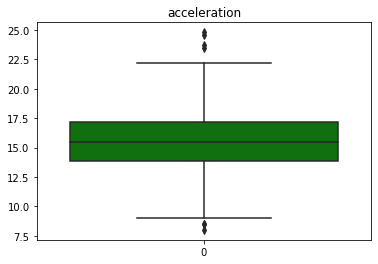

In [ ]:
sns.boxplot(data=mpg['acceleration'],color='green')
plt.title('acceleration')
plt.show()

In [ ]:
def remove_outllier(data: np.array)-> list:
  '''
  outlier index 반환 
  '''
  q1, q3 = np.percentile(data,[25,75])
  iqr = q3 - q1
  # print(iqr)
  lower = q1 - (iqr*1.5)
  upper = q3 + (iqr*1.5)
  return np.where(~((data>upper)|(data <lower)))

In [ ]:
X.loc[remove_outllier(X['acceleration'].values)]

3.3499999999999996


,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,brand_audi,brand_bmw,brand_buick,...,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_triumph,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw,cylinders_cut_labeled
0,307.0,130.0,3504,12.0,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,350.0,165.0,3693,11.5,70,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2
2,318.0,150.0,3436,11.0,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,304.0,150.0,3433,12.0,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,302.0,140.0,3449,10.5,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,151.0,90.0,2950,17.3,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393,140.0,86.0,2790,15.6,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395,135.0,84.0,2295,11.6,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,120.0,79.0,2625,18.6,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 3) Z score 
Z-score 가 클수록 이상치 

$Zscore=\frac{X-\mu}{\sigma} > Threshold $ 

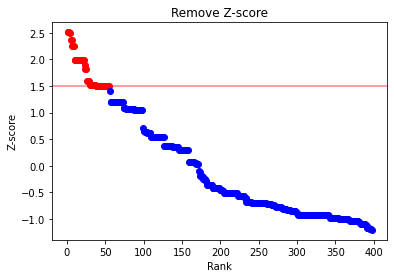

In [ ]:
import scipy.stats as ss 
z_score = ss.zscore(X['displacement'].sort_values(ascending=False))
data = z_score
threshold = 1.5

ranks = np.linspace(1,len(data),len(data))
mask_outlier = data > threshold 

plt.figure()
plt.title('Remove Z-score')
plt.xlabel('Rank')
plt.ylabel('Z-score')
plt.plot(ranks[mask_outlier], data[mask_outlier] , 'o',color='r',label='anomalies')
plt.plot(ranks[~mask_outlier], data[~mask_outlier] , 'o',color='b',label='typical')
plt.axhline(threshold, color='r',label='threshold',alpha=0.5)
plt.show()


In [ ]:
import scipy.stats as ss 
def remove_z(data, z=1.5):
  z_score = ss.zscore(data)

  mask_outlier = z_score > z 

  return np.where(~mask_outlier)

In [ ]:
X.loc[remove_z(X['displacement'].values)]

,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,brand_audi,brand_bmw,brand_buick,...,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_triumph,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw,cylinders_cut_labeled
0,307.0,130.0,3504,12.0,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,318.0,150.0,3436,11.0,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,304.0,150.0,3433,12.0,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,302.0,140.0,3449,10.5,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
11,340.0,160.0,3609,8.0,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,140.0,86.0,2790,15.6,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,97.0,52.0,2130,24.6,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
395,135.0,84.0,2295,11.6,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,120.0,79.0,2625,18.6,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5) Scaling

scikit-learn에서는 다음과 같은 스케일링 클래스를 제공합니다.

- StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.
- RobustScaler(X): 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.
- MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환
- MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환


In [ ]:
X.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration', 'model_year',
       'origin_japan', 'origin_usa', 'brand_audi', 'brand_bmw', 'brand_buick',
       'brand_cadillac', 'brand_capri', 'brand_chevroelt', 'brand_chevrolet',
       'brand_chevy', 'brand_chrysler', 'brand_datsun', 'brand_dodge',
       'brand_fiat', 'brand_ford', 'brand_hi', 'brand_honda', 'brand_maxda',
       'brand_mazda', 'brand_mercedes', 'brand_mercedes-benz', 'brand_mercury',
       'brand_nissan', 'brand_oldsmobile', 'brand_opel', 'brand_peugeot',
       'brand_plymouth', 'brand_pontiac', 'brand_renault', 'brand_saab',
       'brand_subaru', 'brand_toyota', 'brand_toyouta', 'brand_triumph',
       'brand_vokswagen', 'brand_volkswagen', 'brand_volvo', 'brand_vw',
       'cylinders_cut_labeled'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

scaling_features = ['displacement', 'horsepower', 'weight', 'acceleration']

In [ ]:
scaler = MinMaxScaler() # scaler 정의 
scaled = scaler.fit_transform(X[scaling_features]) # 값 학습 후 --> 변환시키기 


In [ ]:
tmp_scaled = pd.DataFrame(scaled, columns=scaling_features)
display(tmp_scaled.head())

,displacement,horsepower,weight,acceleration
0,0.617571,0.456522,0.536150,0.238095
1,0.728682,0.646739,0.589736,0.208333
2,0.645995,0.565217,0.516870,0.178571
3,0.609819,0.565217,0.516019,0.238095
4,0.604651,0.510870,0.520556,0.148810


#### 1) StandardScaler 해보기 


#### 2) 원래데이터와 합치기 

In [ ]:
X_scaled = pd.concat([tmp_scaled,
                      X.drop(scaling_features,axis=1)], axis=1)
X_scaled

,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,brand_audi,brand_bmw,brand_buick,...,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_triumph,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw,cylinders_cut_labeled
0,0.617571,0.456522,0.536150,0.238095,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0.728682,0.646739,0.589736,0.208333,70,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2
2,0.645995,0.565217,0.516870,0.178571,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0.609819,0.565217,0.516019,0.238095,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0.604651,0.510870,0.520556,0.148810,70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.186047,0.217391,0.333711,0.452381,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0.074935,0.032609,0.146583,0.988095,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
395,0.173127,0.206522,0.193365,0.214286,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0.134367,0.179348,0.286929,0.630952,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 📌4. 실제데이터 전처리해보기

In [ ]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv('./data/mineral_spring.csv', 
                       encoding='CP949', # encoding problem utf-8
                       engine='python')
raw_data.head()

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
0,1,백수,모라,양 성,10.0,6.7,부적합
1,2,이칠,모라,음 성,20.0,0.9,적합
2,3,운수사,모라,음 성,10.0,1.1,적합
3,4,서당골,모라,음 성,10.0,NaN,적합
4,5,청수,괘법,음 성,20.0,2.7,적합


In [ ]:
import missingno as msno
msno.matrix(raw_data)

In [ ]:
# 한글 폰트 설치 후 다시시작 필수!!! 
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

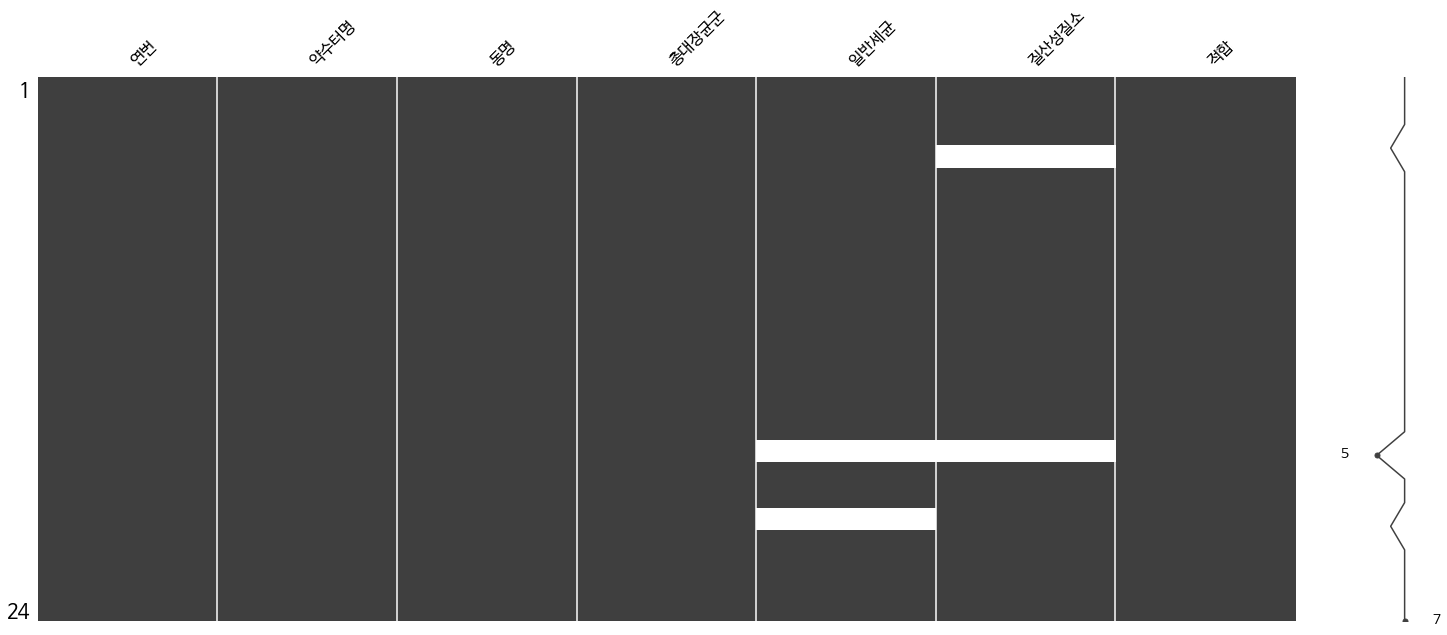

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import missingno as msno
msno.matrix(raw_data)

In [ ]:
# 결측치 확인 
# 결측치 보간하기

raw_data.isna().sum()

연번       0
약수터명     0
동명       0
총대장균군    0
일반세균     2
질산성질소    2
적합       0
dtype: int64

In [ ]:
# 1. 결측치 날리기 
raw_data.dropna()

In [ ]:
# 2. 결측치를 0으로 채우기 
raw_data.fillna(0)

In [ ]:
# 3. 결측치를 평균 으로 채우기 
raw_data.fillna(raw_data.mean())

### 4. interpolationa 방법을 사용하기 
- 각 열의 값을 보고 채우기 axis=0 
- pandas interpolate(보간법) 함수를 사용해서 결측치를 채운다
- method=linear 보간법 함수가 linear 
- limit_direction='backward' # 뒤에서 부터 채워 오기 
- imit_direction='forward' # 앞에서 채우기 
- imit_direction='both' # 양 옆에서 채워나가기 

In [ ]:
raw_data.interpolate(method='linear', axis=0, limit_direction='both')

,연번,약수터명,동명,총대장균군,일반세균,질산성질소,적합
0,1,백수,모라,양 성,10.0,6.7,부적합
1,2,이칠,모라,음 성,20.0,0.9,적합
2,3,운수사,모라,음 성,10.0,1.1,적합
3,4,서당골,모라,음 성,10.0,1.9,적합
4,5,청수,괘법,음 성,20.0,2.7,적합
5,6,사상,괘법,음 성,10.0,2.2,적합
6,7,탑골,괘법,양 성,10.0,2.6,부적합
7,8,삼각산,괘법,음 성,10.0,2.7,적합
8,9,괘내,괘법,음 성,20.0,3.1,적합
9,10,황씨묘위,감전,음 성,10.0,3.1,적합


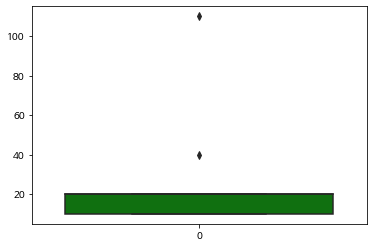

In [ ]:
sns.boxplot(data=raw_data['일반세균'],color='green')

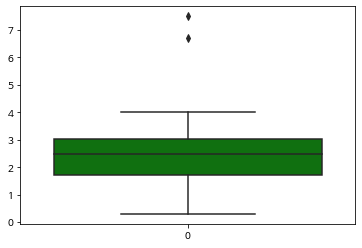

In [ ]:
sns.boxplot(data=raw_data['질산성질소'],color='green')

In [ ]:
# 적합한 데이터만 가져온것
tmp = raw_data[raw_data['적합'] == '적합']
tmp.pivot_table(index = '동명',
               aggfunc = 'mean',
               values=['일반세균', '질산성질소'])

,일반세균,질산성질소
동명,,
감전,15.000000,3.550
괘법,15.000000,2.675
모라,13.333333,1.000
엄궁,20.000000,2.150
주례,15.000000,3.875
학장,20.000000,1.000
